In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import os
from torchvision import transforms
from PIL import Image
import cv2
import random
from tqdm import tqdm
import zipfile
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
import itertools


### обработка первого датасета

In [2]:
class DataTransformer:
    def __init__(self, path_to_data: str):
        self.ptd = path_to_data
        self.dir_data = os.listdir(self.ptd)
        print('dir_data', self.dir_data)
        self.list_of_links = self.get_all_imgs_links()
        self.data_tensors = []

    def get_all_imgs_links(self):
        all_links = [] 
        for path_to_batch in self.dir_data:
            print(f'обработка  для {path_to_batch}')
            batch_imgs_path = os.path.join(self.ptd,path_to_batch)
            print('batch_imgs_path', batch_imgs_path)
            if os.path.exists(batch_imgs_path):
                files = os.listdir(batch_imgs_path)
                imgs_link = [os.path.join(batch_imgs_path, file) for file in files]
                all_links.extend(imgs_link)
                print('imgs count', len(set(all_links)))
            else:
                print(f'папка {path_to_batch} не найдена')
        return all_links

    def transform_data(self, num_augmented=5):
        transform = transforms.Compose([
            transforms.Resize((128, 128)),  
            transforms.RandomHorizontalFlip(p=0.5), 
            transforms.RandomAffine(degrees=5, translate=(0.05, 0.05), scale=(0.8, 1.2)),
            transforms.RandomPerspective(distortion_scale=0.3, p=0.4),
            transforms.RandomRotation(degrees=4),
            transforms.ToTensor(),
            transforms.Lambda(lambda x: (x * 2) - 1)  
        ])
        for img_path in self.list_of_links:
            image = Image.open(img_path).convert('RGB')  
            for _ in range(num_augmented):
                transformed_img = transform(image)
                self.data_tensors.append(transformed_img)
        random.shuffle(self.data_tensors)
        self.data_tensors = self.data_tensors[:18000]
    def show_data(self, imgs_showcase=10):
        fig, axes = plt.subplots(1, imgs_showcase, figsize=(15, 15))
        for i in range(imgs_showcase):
            img = self.data_tensors[i].permute(1, 2, 0).numpy()  
            img = (img + 1) / 2  
            axes[i].imshow(img)
            axes[i].axis('off')  
        plt.show()


    def __len__(self):
        return len(self.data_tensors)


In [3]:
path: str = r'/kaggle/input/cropped-portraits-dataset'
obj = DataTransformer(
    path_to_data=path
)

dir_data ['batch_4', 'batch_1', 'batch_5', 'batch_6', 'batch_3', 'batch_8', 'batch_2', 'batch_7']
обработка  для batch_4
batch_imgs_path /kaggle/input/cropped-portraits-dataset/batch_4
imgs count 500
обработка  для batch_1
batch_imgs_path /kaggle/input/cropped-portraits-dataset/batch_1
imgs count 1000
обработка  для batch_5
batch_imgs_path /kaggle/input/cropped-portraits-dataset/batch_5
imgs count 1500
обработка  для batch_6
batch_imgs_path /kaggle/input/cropped-portraits-dataset/batch_6
imgs count 2000
обработка  для batch_3
batch_imgs_path /kaggle/input/cropped-portraits-dataset/batch_3
imgs count 2500
обработка  для batch_8
batch_imgs_path /kaggle/input/cropped-portraits-dataset/batch_8
imgs count 2703
обработка  для batch_2
batch_imgs_path /kaggle/input/cropped-portraits-dataset/batch_2
imgs count 3203
обработка  для batch_7
batch_imgs_path /kaggle/input/cropped-portraits-dataset/batch_7
imgs count 3703


In [4]:
obj.transform_data()

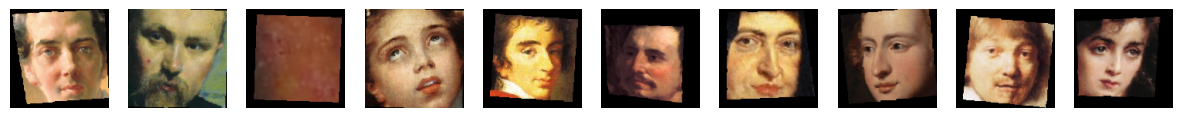

In [5]:
obj.show_data()

In [6]:
len(obj)

18000

In [7]:
obj.data_tensors[0]

tensor([[[-1., -1., -1.,  ..., -1., -1., -1.],
         [-1., -1., -1.,  ..., -1., -1., -1.],
         [-1., -1., -1.,  ..., -1., -1., -1.],
         ...,
         [-1., -1., -1.,  ..., -1., -1., -1.],
         [-1., -1., -1.,  ..., -1., -1., -1.],
         [-1., -1., -1.,  ..., -1., -1., -1.]],

        [[-1., -1., -1.,  ..., -1., -1., -1.],
         [-1., -1., -1.,  ..., -1., -1., -1.],
         [-1., -1., -1.,  ..., -1., -1., -1.],
         ...,
         [-1., -1., -1.,  ..., -1., -1., -1.],
         [-1., -1., -1.,  ..., -1., -1., -1.],
         [-1., -1., -1.,  ..., -1., -1., -1.]],

        [[-1., -1., -1.,  ..., -1., -1., -1.],
         [-1., -1., -1.,  ..., -1., -1., -1.],
         [-1., -1., -1.,  ..., -1., -1., -1.],
         ...,
         [-1., -1., -1.,  ..., -1., -1., -1.],
         [-1., -1., -1.,  ..., -1., -1., -1.],
         [-1., -1., -1.,  ..., -1., -1., -1.]]])

### обработка второго датасета

In [8]:
path:str = r'/kaggle/input/cropped-faces-dataset'
obj2 = DataTransformer(
    path_to_data = path
)

dir_data ['batch_faces_4', 'batch_faces_8', 'batch_faces_3', 'batch_faces_5', 'batch_faces_1', 'batch_faces_7', 'batch_faces_2', 'batch_faces_6']
обработка  для batch_faces_4
batch_imgs_path /kaggle/input/cropped-faces-dataset/batch_faces_4
imgs count 500
обработка  для batch_faces_8
batch_imgs_path /kaggle/input/cropped-faces-dataset/batch_faces_8
imgs count 1000
обработка  для batch_faces_3
batch_imgs_path /kaggle/input/cropped-faces-dataset/batch_faces_3
imgs count 1500
обработка  для batch_faces_5
batch_imgs_path /kaggle/input/cropped-faces-dataset/batch_faces_5
imgs count 2000
обработка  для batch_faces_1
batch_imgs_path /kaggle/input/cropped-faces-dataset/batch_faces_1
imgs count 2500
обработка  для batch_faces_7
batch_imgs_path /kaggle/input/cropped-faces-dataset/batch_faces_7
imgs count 3000
обработка  для batch_faces_2
batch_imgs_path /kaggle/input/cropped-faces-dataset/batch_faces_2
imgs count 3500
обработка  для batch_faces_6
batch_imgs_path /kaggle/input/cropped-faces-datas

In [9]:
obj2.transform_data()

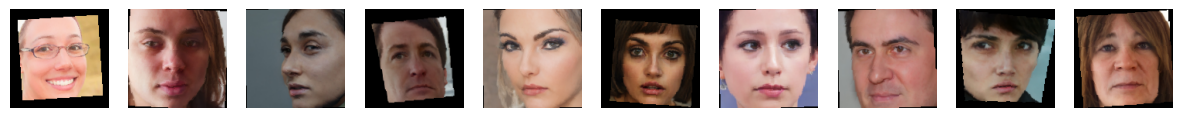

In [10]:
obj2.show_data()

In [11]:
len(obj2)

18000

In [12]:
obj2.data_tensors[1]

tensor([[[-1., -1., -1.,  ..., -1., -1., -1.],
         [-1., -1., -1.,  ..., -1., -1., -1.],
         [-1., -1., -1.,  ..., -1., -1., -1.],
         ...,
         [-1., -1., -1.,  ..., -1., -1., -1.],
         [-1., -1., -1.,  ..., -1., -1., -1.],
         [-1., -1., -1.,  ..., -1., -1., -1.]],

        [[-1., -1., -1.,  ..., -1., -1., -1.],
         [-1., -1., -1.,  ..., -1., -1., -1.],
         [-1., -1., -1.,  ..., -1., -1., -1.],
         ...,
         [-1., -1., -1.,  ..., -1., -1., -1.],
         [-1., -1., -1.,  ..., -1., -1., -1.],
         [-1., -1., -1.,  ..., -1., -1., -1.]],

        [[-1., -1., -1.,  ..., -1., -1., -1.],
         [-1., -1., -1.,  ..., -1., -1., -1.],
         [-1., -1., -1.,  ..., -1., -1., -1.],
         ...,
         [-1., -1., -1.,  ..., -1., -1., -1.],
         [-1., -1., -1.,  ..., -1., -1., -1.],
         [-1., -1., -1.,  ..., -1., -1., -1.]]])

### создание единого датасета 

In [13]:
from torch.utils.data import Dataset, DataLoader

class UnitedDataset(Dataset):
    def __init__(self, face_data_tensors, art_portraits_data_tensors):
        self.fdt = face_data_tensors
        self.apdt = art_portraits_data_tensors
    def __len__(self):
        return min(len(self.fdt), len(self.apdt))
    def __getitem__(self, idx):
        face_img = self.fdt[idx]
        art_img = self.apdt[idx]
        return {'face': face_img, 'art': art_img}

In [14]:
art_data = obj.data_tensors
face_data = obj2.data_tensors

In [15]:
df = UnitedDataset(face_data, art_data)

In [16]:
data_loader = DataLoader(df, batch_size=5, shuffle=True)

In [17]:
batch = next(iter(data_loader))
face_imgs, baroque_imgs = batch["face"], batch["art"]

print(face_imgs.shape)  
print(baroque_imgs.shape)


torch.Size([5, 3, 128, 128])
torch.Size([5, 3, 128, 128])


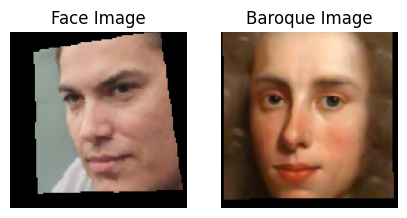

In [18]:

face_img = (face_imgs[0] + 1) / 2
baroque_img = (baroque_imgs[0] + 1) / 2

face_img = face_img.permute(1, 2, 0).cpu().numpy()
baroque_img = baroque_img.permute(1, 2, 0).cpu().numpy()

fig, ax = plt.subplots(1, 2, figsize=(5, 5))
ax[0].imshow(face_img)
ax[0].set_title("Face Image")
ax[0].axis("off")

ax[1].imshow(baroque_img)
ax[1].set_title("Baroque Image")
ax[1].axis("off")

plt.show()


### написание генераторов

In [20]:
class ResidualBlock(nn.Module):
    def __init__(self, in_channels):
        super(ResidualBlock, self).__init__()
        self.block = nn.Sequential(
            nn.ReflectionPad2d(1),
            nn.Conv2d(in_channels, in_channels, kernel_size=3, stride=1),
            nn.InstanceNorm2d(in_channels),
            nn.ReLU(inplace=True),
            nn.ReflectionPad2d(1),
            nn.Conv2d(in_channels, in_channels, kernel_size=3, stride=1),
            nn.InstanceNorm2d(in_channels)
        )
    def forward(self, x):
        return x+self.conv_block(x)

In [21]:
class ResidualBlock(nn.Module):
    def __init__(self, in_channels):
        super(ResidualBlock, self).__init__()
        self.conv_block = nn.Sequential(
            nn.Conv2d(in_channels, in_channels, kernel_size=3, stride=1, padding=1),
            nn.InstanceNorm2d(in_channels),
            nn.ReLU(inplace=True),
            nn.Conv2d(in_channels, in_channels, kernel_size=3, stride=1, padding=1),
            nn.InstanceNorm2d(in_channels)
        )
    
    def forward(self, x):
        return x + self.conv_block(x)


class GeneratorResNet(nn.Module):
    def __init__(self, in_channels, num_residual_blocks=9):
        super(GeneratorResNet, self).__init__()
        
        self.initial = nn.Sequential(
            nn.ReflectionPad2d(3), 
            nn.Conv2d(in_channels, 64, kernel_size=7, stride=1, padding=0), 
            nn.InstanceNorm2d(64),
            nn.ReLU(inplace=True)
        )
        
        self.downsample = nn.Sequential(
            nn.Conv2d(64, 128, kernel_size=3, stride=2, padding=1),
            nn.InstanceNorm2d(128),
            nn.ReLU(inplace=True),
            nn.Conv2d(128, 256, kernel_size=3, stride=2, padding=1),
            nn.InstanceNorm2d(256),
            nn.ReLU(inplace=True)
        )
        
        self.residual_blocks = nn.Sequential(*[ResidualBlock(256) for _ in range(num_residual_blocks)])
        
        self.upsample_blocks = nn.Sequential(
            nn.Upsample(scale_factor=2, mode='nearest'),
            nn.Conv2d(256, 128, kernel_size=3, stride=1, padding=1),
            nn.InstanceNorm2d(128),
            nn.ReLU(inplace=True),
            nn.Upsample(scale_factor=2, mode='nearest'),
            nn.Conv2d(128, 64, kernel_size=3, stride=1, padding=1),
            nn.InstanceNorm2d(64),
            nn.ReLU(inplace=True)
        )
        
        self.output = nn.Sequential(
            nn.ReflectionPad2d(3),  
            nn.Conv2d(64, in_channels, kernel_size=7, stride=1, padding=0),  
            nn.Tanh()
        )
    
    def forward(self, x):
        x = self.initial(x)
        x = self.downsample(x)
        x = self.residual_blocks(x)
        x = self.upsample_blocks(x)
        x = self.output(x)
        return x


### написание дискриминаторов


In [22]:
class Discriminator(nn.Module):
    def __init__(self, in_channels):
        super(Discriminator,self).__init__()
        self.scale_factor = 16
        self.model = nn.Sequential(
            nn.Conv2d(in_channels, 64, kernel_size=4, stride=2, padding=1),
            nn.LeakyReLU(0.2, inplace=True),
            
            nn.Conv2d(64, 128, kernel_size=4, stride=2, padding=1),
            nn.InstanceNorm2d(128),
            nn.LeakyReLU(0.2, inplace=True),
            
                        
            nn.Conv2d(128, 256, kernel_size=4, stride=2, padding=1),
            nn.InstanceNorm2d(256),
            nn.LeakyReLU(0.2, inplace=True),
            
                        
            nn.Conv2d(256, 512, kernel_size=4, stride=2, padding=1),
            nn.InstanceNorm2d(512),
            nn.LeakyReLU(0.2, inplace=True),
            
            
            nn.Conv2d(512, 1, kernel_size=4, stride=1, padding=1),
            nn.Sigmoid()
            
        )
    def forward(self, x):
        return self.model(x)

### train loop 

In [23]:
G_XY = GeneratorResNet(3, num_residual_blocks=9)
D_Y = Discriminator(3)

G_YX = GeneratorResNet(3, num_residual_blocks=9)
D_X = Discriminator(3)

In [24]:
cuda_available = torch.cuda.is_available()
Tensor = torch.cuda.FloatTensor if cuda_available else torch.Tensor
print(f'CUDA Available: {cuda_available}')

# Transfer models to CUDA if available
models = [G_XY, D_Y, G_YX, D_X]
for model in models:
    if cuda_available:
        model.cuda()

gan_loss = nn.MSELoss().cuda()
cycle_loss = nn.L1Loss().cuda()
identity_loss = nn.L1Loss().cuda()

CUDA Available: True


In [25]:
lr = 0.0001
beta1 = 0.5
beta2 = 0.996
optimizer_G = optim.Adam(itertools.chain(G_XY.parameters(), G_YX.parameters()), lr=lr, betas=(beta1, beta2))
optimizer_D_X = optim.Adam(D_X.parameters(), lr=lr, betas=(beta1, beta2))
optimizer_D_Y = optim.Adam(D_Y.parameters(), lr=lr, betas=(beta1, beta2))

In [26]:
n_epoches =  3 
decay_epoch = 2
display_epoch = 1

In [27]:
def learning_rate_decay(epoch, decay_start_epoch, total_epochs):
    if epoch < decay_start_epoch:
        return 1
    else:
        return 1 - (epoch - decay_start_epoch) / (total_epochs - decay_start_epoch)

lr_scheduler_G = torch.optim.lr_scheduler.LambdaLR(optimizer_G, lr_lambda=lambda epoch: learning_rate_decay(epoch, decay_epoch, n_epoches))
lr_scheduler_D_X = torch.optim.lr_scheduler.LambdaLR(optimizer_D_X, lr_lambda=lambda epoch: learning_rate_decay(epoch, decay_epoch, n_epoches))
lr_scheduler_D_Y = torch.optim.lr_scheduler.LambdaLR(optimizer_D_Y, lr_lambda=lambda epoch: learning_rate_decay(epoch, decay_epoch, n_epoches))

In [28]:
def show_images(real_A, real_B, fake_A, fake_B, epoch):
    real_A = real_A.cpu().detach().numpy()
    real_B = real_B.cpu().detach().numpy()
    fake_A = fake_A.cpu().detach().numpy()
    fake_B = fake_B.cpu().detach().numpy()
    real_A = (real_A + 1) / 2
    real_B = (real_B + 1) / 2
    fake_A = (fake_A + 1) / 2
    fake_B = (fake_B + 1) / 2


    fig, axes = plt.subplots(2, 2, figsize=(10, 10))

    axes[0, 0].imshow(real_A[0].transpose(1, 2, 0))  
    axes[0, 0].set_title('Real Face')
    axes[0, 1].imshow(fake_B[0].transpose(1, 2, 0))
    axes[0, 1].set_title('Fake Barocco')
    axes[1, 0].imshow(real_B[0].transpose(1, 2, 0))  
    axes[1, 0].set_title('Real Barocco')
    axes[1, 1].imshow(fake_A[0].transpose(1, 2, 0)) 
    axes[1, 1].set_title('Fake Face')

    for ax in axes.flatten():
        ax.axis('off')  

    plt.tight_layout()
    plt.savefig(f'epoch_{epoch}.png')  
    plt.show()  


In [29]:
def train_cycle_gan(generator_A2B, generator_B2A, discriminator_A, discriminator_B, data_loader, num_epochs=5, device='cuda'):

    criterion_GAN = torch.nn.MSELoss() 
    criterion_cycle = torch.nn.L1Loss()  


    optimizer_G = optim.Adam(
        itertools.chain(generator_A2B.parameters(), generator_B2A.parameters()), lr=0.0002, betas=(0.5, 0.999)
    )
    optimizer_D_A = optim.Adam(discriminator_A.parameters(), lr=0.0002, betas=(0.5, 0.999))
    optimizer_D_B = optim.Adam(discriminator_B.parameters(), lr=0.0002, betas=(0.5, 0.999))

    generator_A2B.to(device)
    generator_B2A.to(device)
    discriminator_A.to(device)
    discriminator_B.to(device)


    for epoch in range(num_epochs):
        epoch_loss_G = 0
        epoch_loss_D_A = 0
        epoch_loss_D_B = 0


        with tqdm(total=len(data_loader), desc=f"Epoch {epoch+1}/{num_epochs}") as pbar:
            for i, batch in enumerate(data_loader):
                real_A = batch['face'].to(device)  
                real_B = batch['art'].to(device)  

            
                optimizer_G.zero_grad()


                fake_B = generator_A2B(real_A)  
                fake_A = generator_B2A(real_B)  


                pred_fake_B = discriminator_B(fake_B)
                loss_G_A2B = criterion_GAN(pred_fake_B, torch.ones_like(pred_fake_B))  # 
                pred_fake_A = discriminator_A(fake_A)
                loss_G_B2A = criterion_GAN(pred_fake_A, torch.ones_like(pred_fake_A))  # 

                cycle_A = generator_B2A(fake_B) 
                cycle_B = generator_A2B(fake_A)  

                loss_cycle_A = criterion_cycle(cycle_A, real_A) * 10.0  
                loss_cycle_B = criterion_cycle(cycle_B, real_B) * 10.0

                loss_G = loss_G_A2B + loss_G_B2A + loss_cycle_A + loss_cycle_B
                loss_G.backward()
                optimizer_G.step()

                epoch_loss_G += loss_G.item()


                optimizer_D_A.zero_grad()
                optimizer_D_B.zero_grad()


                pred_real_A = discriminator_A(real_A)
                loss_D_A_real = criterion_GAN(pred_real_A, torch.ones_like(pred_real_A))  
                pred_fake_A = discriminator_A(fake_A.detach())
                loss_D_A_fake = criterion_GAN(pred_fake_A, torch.zeros_like(pred_fake_A))  

                pred_real_B = discriminator_B(real_B)
                loss_D_B_real = criterion_GAN(pred_real_B, torch.ones_like(pred_real_B))  # 
                pred_fake_B = discriminator_B(fake_B.detach())
                loss_D_B_fake = criterion_GAN(pred_fake_B, torch.zeros_like(pred_fake_B))  # 
                loss_D_A = (loss_D_A_real + loss_D_A_fake) * 0.5
                loss_D_B = (loss_D_B_real + loss_D_B_fake) * 0.5

                loss_D_A.backward()
                loss_D_B.backward()
                optimizer_D_A.step()
                optimizer_D_B.step()

                epoch_loss_D_A += loss_D_A.item()
                epoch_loss_D_B += loss_D_B.item()

                pbar.set_postfix(loss_G=loss_G.item(), loss_D_A=loss_D_A.item(), loss_D_B=loss_D_B.item())
                pbar.update(1)

        print(f"Epoch [{epoch+1}/{num_epochs}] - Loss G: {epoch_loss_G/len(data_loader):.4f}, " 
              f"Loss D_A: {epoch_loss_D_A/len(data_loader):.4f}, Loss D_B: {epoch_loss_D_B/len(data_loader):.4f}")
        
        with torch.no_grad(): 
            show_images(real_A, real_B, fake_A, fake_B, epoch+1)


Epoch 1/5: 100%|██████████| 3600/3600 [14:26<00:00,  4.16it/s, loss_D_A=0.24, loss_D_B=0.211, loss_G=3.18]


Epoch [1/5] - Loss G: 3.5925, Loss D_A: 0.2049, Loss D_B: 0.2143


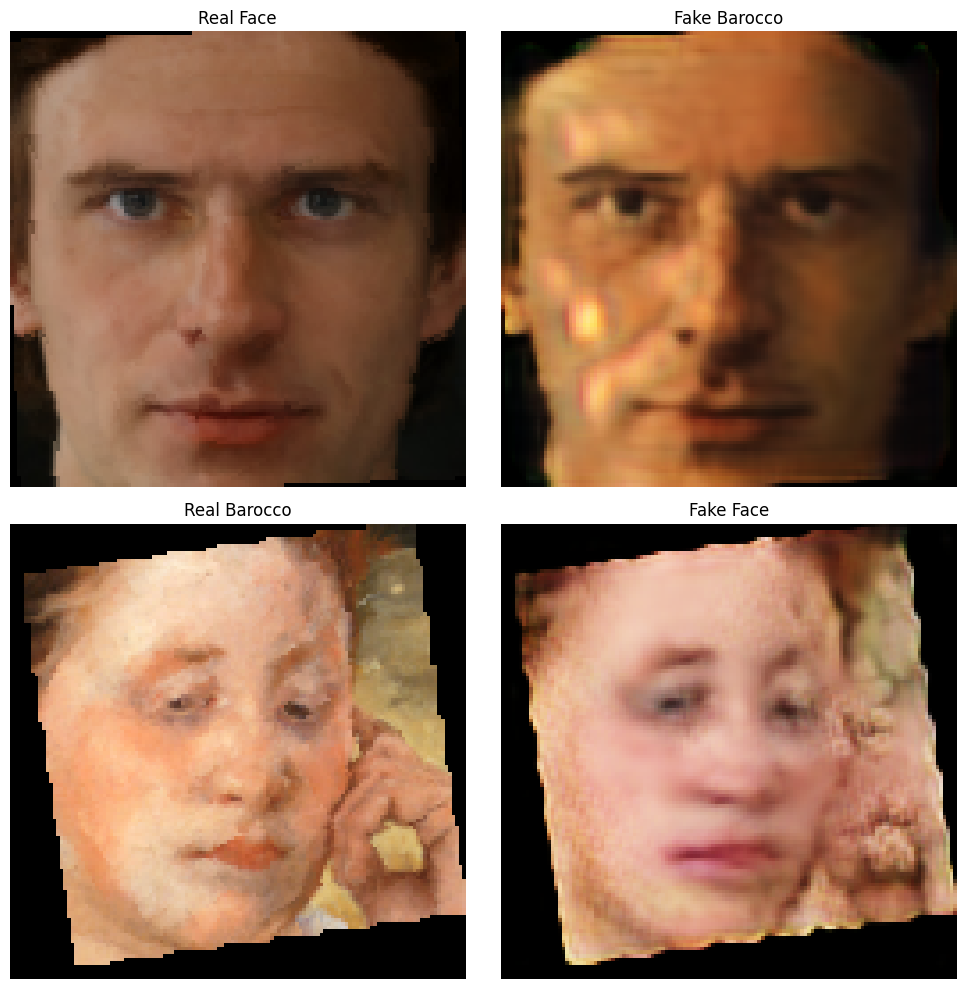

Epoch 2/5: 100%|██████████| 3600/3600 [14:25<00:00,  4.16it/s, loss_D_A=0.239, loss_D_B=0.231, loss_G=2.48]


Epoch [2/5] - Loss G: 2.9095, Loss D_A: 0.1917, Loss D_B: 0.2131


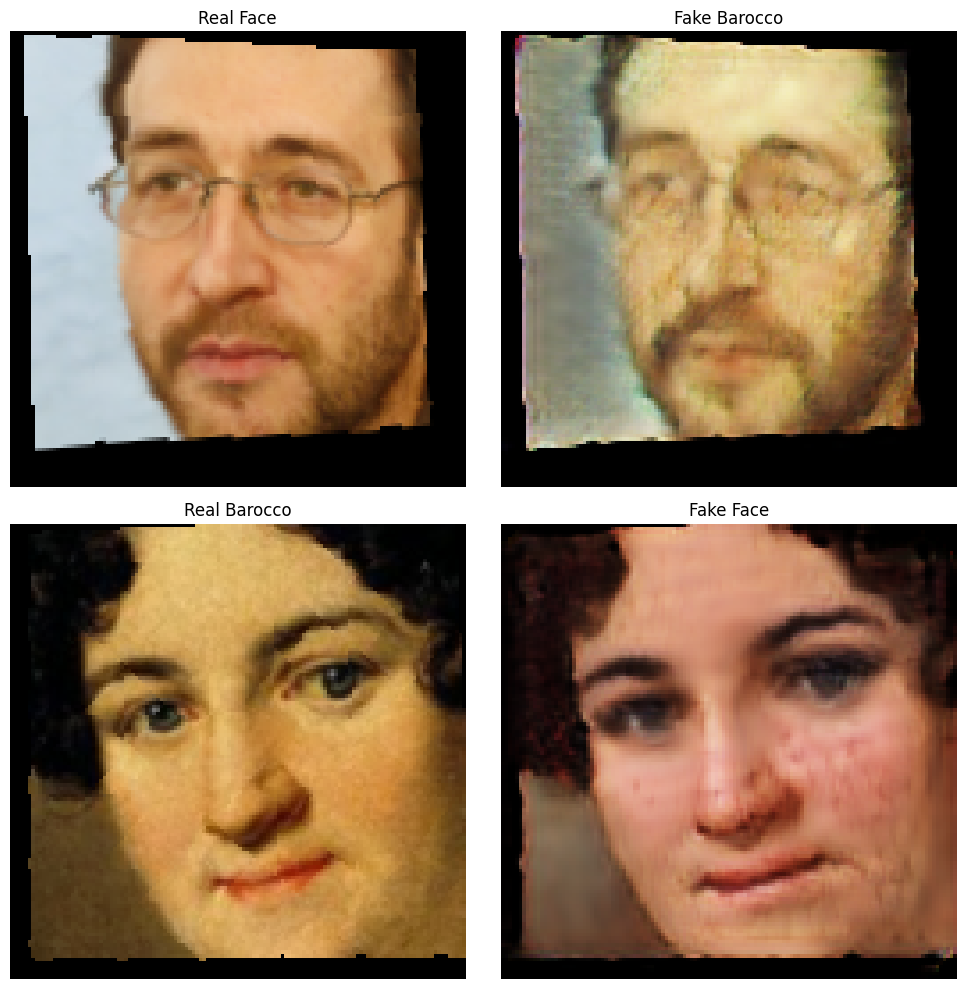

Epoch 3/5: 100%|██████████| 3600/3600 [14:24<00:00,  4.16it/s, loss_D_A=0.157, loss_D_B=0.147, loss_G=2.87]


Epoch [3/5] - Loss G: 2.7731, Loss D_A: 0.1793, Loss D_B: 0.2057


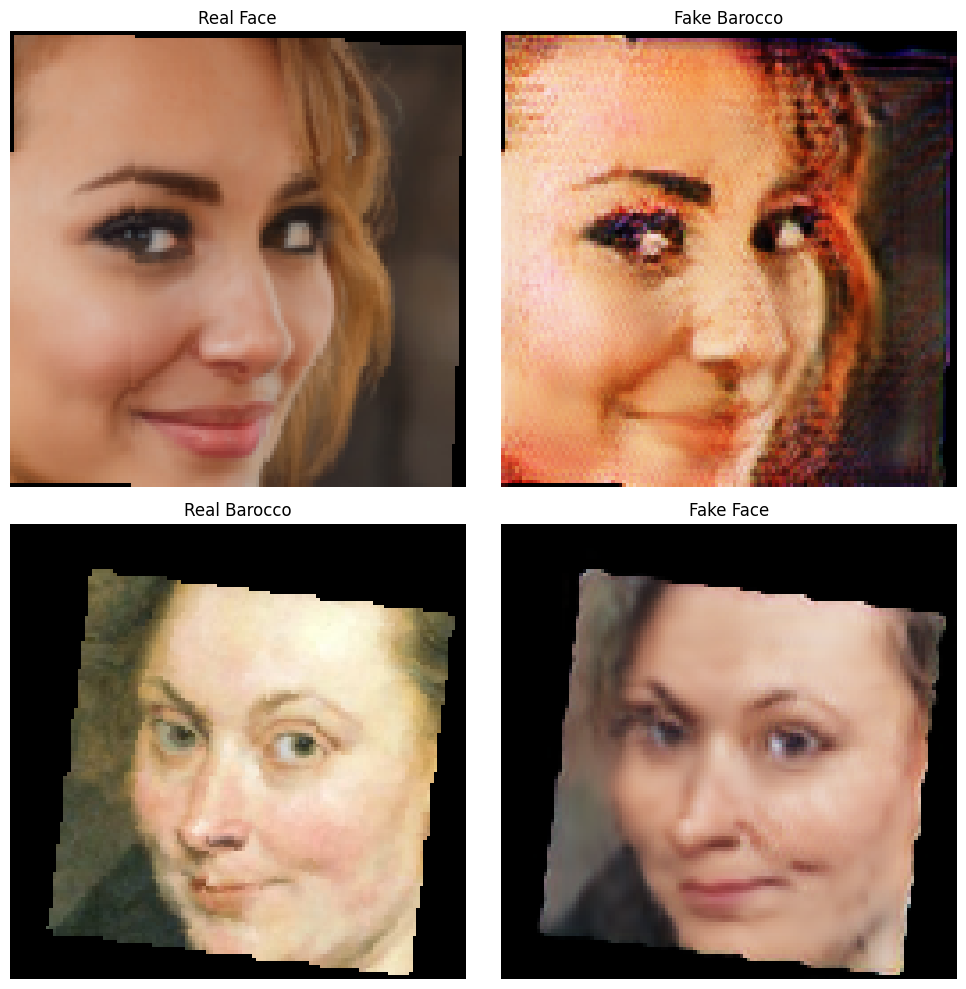

Epoch 4/5: 100%|██████████| 3600/3600 [14:24<00:00,  4.17it/s, loss_D_A=0.18, loss_D_B=0.211, loss_G=2.5]


Epoch [4/5] - Loss G: 2.6975, Loss D_A: 0.1723, Loss D_B: 0.1995


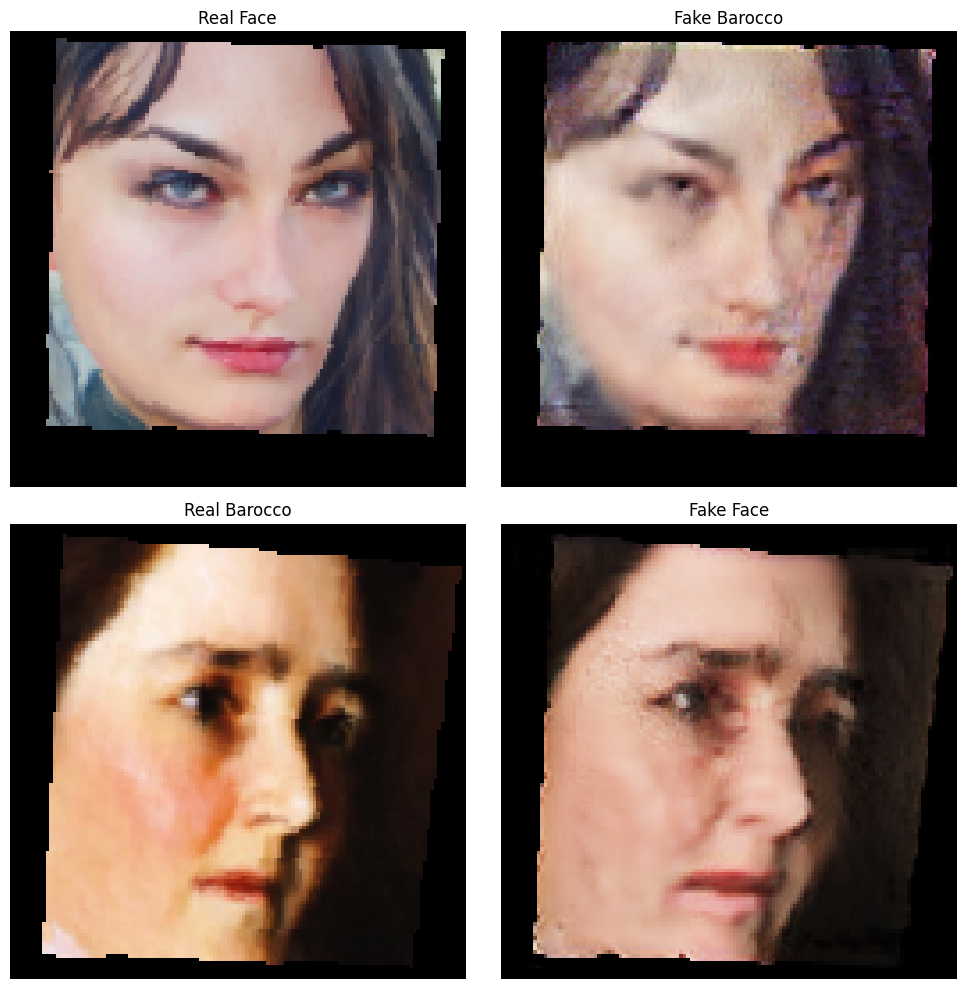

Epoch 5/5: 100%|██████████| 3600/3600 [14:24<00:00,  4.16it/s, loss_D_A=0.162, loss_D_B=0.271, loss_G=2.4]


Epoch [5/5] - Loss G: 2.6445, Loss D_A: 0.1664, Loss D_B: 0.1962


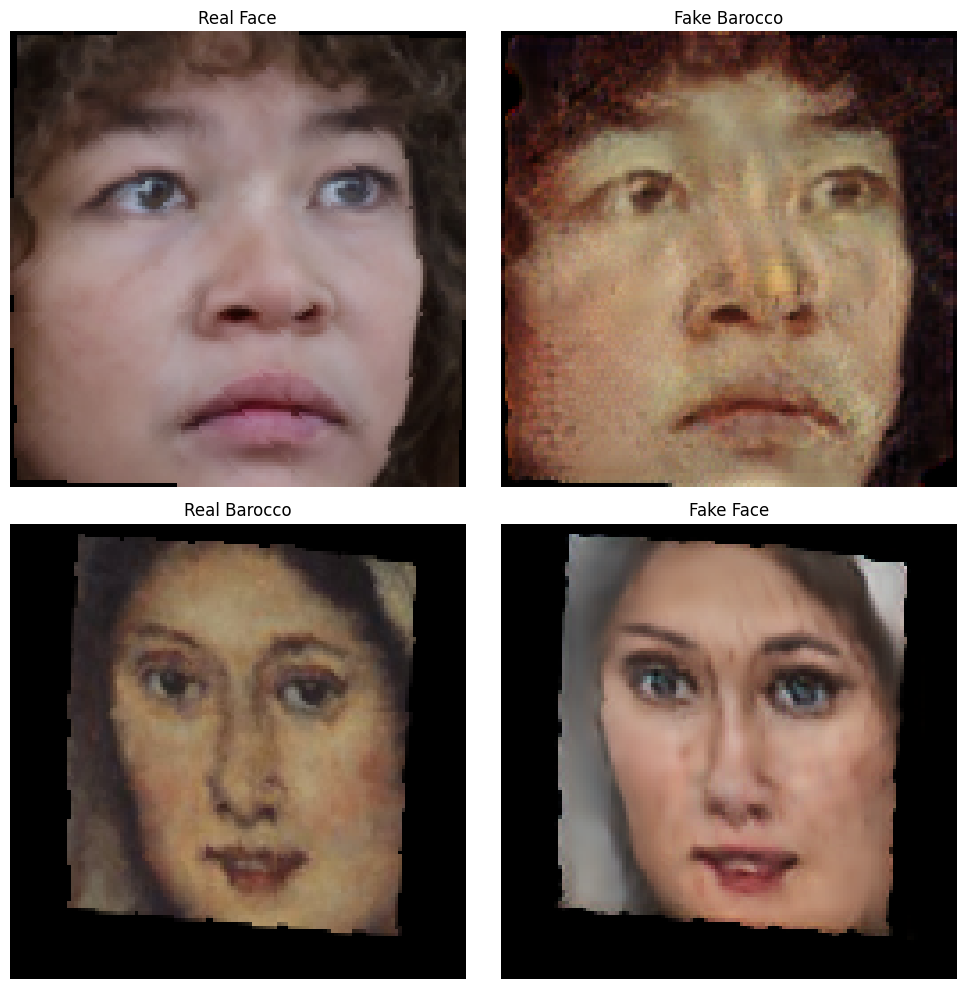

In [30]:
train_cycle_gan(G_XY, G_YX, D_X, D_Y, data_loader)